# Câncer de Pele
Fontes: 
https://www.kaggle.com/fanconic/skin-cancer-malignant-vs-benign

https://saude.gov.br/saude-de-a-z/cancer-de-pele

https://www.sbd.org.br/

https://www.inca.gov.br/tipos-de-cancer/cancer-de-pele-nao-melanoma


# Bibliotecas

In [38]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
import tensorflow as tf
import keras as K
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.linear_model import LogisticRegression
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import KFold
import joblib
from sklearn.pipeline import Pipeline
import cv2
from PIL import Image

# Dataset

Para o treino, foram utilizados 400 imagens no total, sendo 200 imagens de manchas benígnas e 200 imagens de manchas malígnas para que possa balancear o DataFrame.

Já no caso do teste, foram utilizadas 85 imagens de manchas benígnas e 15 imagens de manchas malígnas, já que na campanha de 2018 realizado no Dia Nacional de Combate ao Câncer de Pele foram constatados que 15% dos exames realizados possuíam câncer de pele.

Fonte: http://sbd.tempsite.ws/capele/gestao/incidencia.asp?uf=NULL&cidade=NULL&servico=NULL&campanha=17

In [2]:
real_list=[]
path = 'data/train/benign'
for item in range(0,200):
    foto = path_test[item]
    img=mpimg.imread(f'{path}/{foto}')
    scaled = img / 255
    data = scaled.reshape(scaled.shape[0] * scaled.shape[1] * scaled.shape[2])
    real_list.append(data)
train_b = pd.DataFrame(real_list)

real_list=[]
path = 'data/train/malignant'
for item in range(0,200):
    foto = path_test[item]
    img=mpimg.imread(f'{path}/{foto}')
    scaled = img / 255
    data = scaled.reshape(scaled.shape[0] * scaled.shape[1] * scaled.shape[2])
    real_list.append(data)
train_m = pd.DataFrame(real_list)

train = train_b.append(train_m, ignore_index=True)

train['target'] = 0
for item in range(0,400):
    if item < 200:
        train['target'][item] = 0
    else: 
        train['target'][item] = 1
        
#train.to_csv('data_train.csv', compression='zip')

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [3]:
real_list=[]
path = 'data/test/benign'
for item in range(0,85):
    foto = path_test[item]
    img=mpimg.imread(f'{path}/{foto}')
    scaled = img / 255
    data = scaled.reshape(scaled.shape[0] * scaled.shape[1] * scaled.shape[2])
    real_list.append(data)
test_b = pd.DataFrame(real_list)

real_list=[]
path = 'data/test/malignant'
for item in range(0,15):
    foto = path_test[item]
    img=mpimg.imread(f'{path}/{foto}')
    scaled = img / 255
    data = scaled.reshape(scaled.shape[0] * scaled.shape[1] * scaled.shape[2])
    real_list.append(data)
test_m = pd.DataFrame(real_list)

test = test_b.append(test_m, ignore_index=True)

test['target'] = 0
for item in range(0,100):
    if item < 85:
        test['target'][item] = 0
    else: 
        test['target'][item] = 1
        
#test.to_csv('data_test.csv', compression='zip')

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# PCA

Diminuir a quantidade de colunas mantendo 80% da qualidade dos dados, pois utilizar redes neurais com muitas colunas, a análise demora muito.

In [4]:
X_train = train.drop(columns=['target'])
y_train = train['target']
X_test = test.drop(columns=['target'])
y_test = test['target']

In [5]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,150518,150519,150520,150521,150522,150523,150524,150525,150526,150527
0,0.870588,0.686275,0.756863,0.874510,0.694118,0.737255,0.874510,0.694118,0.745098,0.886275,...,0.541176,0.749020,0.556863,0.541176,0.764706,0.560784,0.568627,0.776471,0.568627,0.592157
1,0.831373,0.470588,0.521569,0.835294,0.474510,0.517647,0.839216,0.478431,0.521569,0.854902,...,0.458824,0.752941,0.439216,0.443137,0.749020,0.435294,0.431373,0.764706,0.447059,0.435294
2,0.823529,0.501961,0.549020,0.815686,0.513725,0.552941,0.835294,0.537255,0.576471,0.843137,...,0.450980,0.709804,0.482353,0.435294,0.713725,0.486275,0.431373,0.721569,0.486275,0.443137
3,0.631373,0.462745,0.490196,0.631373,0.466667,0.482353,0.631373,0.462745,0.490196,0.631373,...,0.419608,0.572549,0.396078,0.423529,0.564706,0.388235,0.415686,0.556863,0.380392,0.407843
4,0.917647,0.623529,0.705882,0.921569,0.635294,0.713725,0.905882,0.623529,0.701961,0.909804,...,0.709804,0.901961,0.678431,0.705882,0.909804,0.678431,0.701961,0.901961,0.678431,0.701961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.807843,0.576471,0.552941,0.827451,0.576471,0.568627,0.835294,0.564706,0.537255,0.823529,...,0.498039,0.800000,0.576471,0.501961,0.796078,0.576471,0.509804,0.788235,0.580392,0.517647
396,0.058824,0.035294,0.043137,0.062745,0.023529,0.027451,0.066667,0.027451,0.023529,0.066667,...,0.058824,0.066667,0.027451,0.058824,0.062745,0.019608,0.050980,0.054902,0.019608,0.031373
397,0.094118,0.047059,0.062745,0.117647,0.058824,0.086275,0.141176,0.070588,0.117647,0.168627,...,0.070588,0.078431,0.043137,0.054902,0.074510,0.031373,0.047059,0.074510,0.023529,0.050980
398,0.796078,0.705882,0.737255,0.780392,0.690196,0.721569,0.784314,0.694118,0.725490,0.796078,...,0.568627,0.682353,0.584314,0.556863,0.690196,0.584314,0.549020,0.686275,0.580392,0.545098


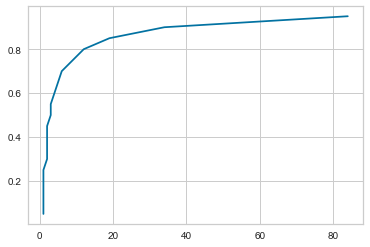

In [6]:
percent = []
components = []

for i in range (5,100, 5):
    pca = PCA(i/100)
    percent.append(i/100)
    components.append(len(pca.fit_transform(X_train)[0]))
    
plt.plot(components, percent)
plt.grid(True)

In [7]:
pca = PCA(0.80)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [8]:
X_train.shape #Ao manter 80% da qualidade dos dados, foi possível reduzir para 12 colunas

(400, 12)

# Regressão Logística

In [9]:
logistic = LogisticRegression(max_iter=1000, C=0.01)
logistic.fit(X_train,y_train)
logistic.score(X_test, y_test)

0.7

In [10]:
logistic.score(X_train, y_train)

0.7675

C:\Users\yukar\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


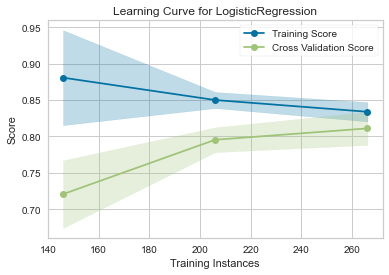

In [11]:
visualizer = LearningCurve(logistic, cv=KFold(n_splits=3, shuffle=True), scoring='roc_auc', n_jobs=4)
visualizer.fit(X_train, y_train)
visualizer.show()  

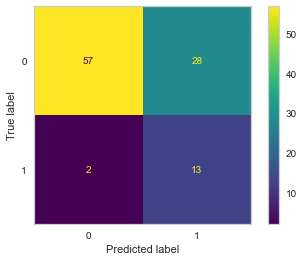

In [14]:
plot_confusion_matrix(logistic, X_test, y_test, values_format='.0f')
plt.grid(False)

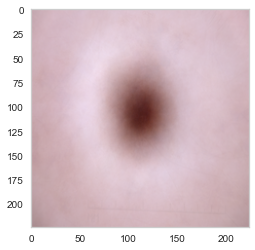

In [33]:
plt.imshow(pca.inverse_transform(X_train[-2]).reshape(224,224,3))
plt.grid(False)

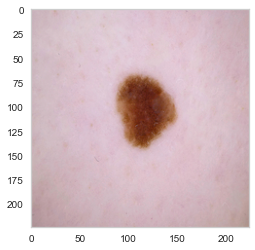

In [34]:
X_train1 = train.drop(columns=['target'])
plt.imshow(X_train1.iloc[-2].values.reshape(224,224,3))
plt.grid(False)

# Pipeline
Fazendo o pipeline para salvar e aplicar no app.

In [48]:
X_train = train.drop(columns=['target'])
y_train = train['target']
X_test = test.drop(columns=['target'])
y_test = test['target']

In [51]:
pca = PCA(0.8)
logistic = LogisticRegression(max_iter=1000, C=0.01)
pipe = Pipeline([('pca', pca), ('logistic', logistic)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=0.8)),
                ('logistic', LogisticRegression(C=0.01, max_iter=1000))])

In [53]:
pipe.score(X_test, y_test)

0.7

In [54]:
pipe.score(X_train, y_train)

0.7675

In [55]:
joblib.dump(pipe, 'pipe.joblib')

['pipe.joblib']

# Teste

In [74]:
img=mpimg.imread('data/train/malignant/1245.jpg')
scaled = img / 255
X_upload = scaled.reshape(scaled.shape[0] * scaled.shape[1] * scaled.shape[2])

In [79]:
X_upload = pd.DataFrame(X_upload).T
X_upload

,0,1,2,3,4,5,6,7,8,9,...,150518,150519,150520,150521,150522,150523,150524,150525,150526,150527
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
result = pipe.predict_proba(X_upload)

In [81]:
result

array([[0.10118454, 0.89881546]])

In [94]:
image = Image.open('data/train/malignant/1245.jpg')
scaled = np.array(image) / 255.0
scaled = cv2.resize(scaled, (224, 224))

In [92]:
image.shape

(224, 224, 3)

# Keras (Bônus)

Foi utilizado uma Rede Neural Convolucional, onde não há influencias entre os dados. Caso tenha influência, ele pode dar puxar os dados da foto anterior e classificar sofrendo influência.

## Acurácia

In [17]:
model = Sequential()
model.add(Dense(units = 12, input_dim=12, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=12, input_dim=12, activation="relu", kernel_initializer="uniform")`
  
C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [18]:
model.fit(X_train, y_train, nb_epoch=150, batch_size=20)

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Use tf.cast instead.
Epoch 1/150
400/400 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.4950
Epoch 2/150
400/400 [==============================] - 0s 55us/step - loss: 0.6913 - accuracy: 0.5950
Epoch 3/150
400/400 [==============================] - 0s 55us/step - loss: 0.6847 - accuracy: 0.7475
Epoch 4/150
400/400 [==============================] - 0s 57us/step - loss: 0.6592 - accuracy: 0.7850
Epoch 5/150
400/400 [==============================] - 0s 55us/step - loss: 0.6000 - accuracy: 0.7875
Epoch 6/150
400/400 [==============================] - 0s 55us/step - loss: 0.5232 - accuracy: 0.7850
Epoch 7/150
400/400 [==============================] - 0s 57us/step - loss: 0.4696 - accuracy: 0.7900
Epoch 8/150
400/400 [==============================] - 0s 65us/step - loss: 0.4464 - accuracy: 0.7900
Epoch 9/150
400/400 [==============================] - 0s 65us/step - loss: 0.4351 - accuracy: 0.7950
Epoch 10/150
400/400 [=============

400/400 [==============================] - 0s 52us/step - loss: 0.2838 - accuracy: 0.9000
Epoch 79/150
400/400 [==============================] - 0s 52us/step - loss: 0.2847 - accuracy: 0.8925
Epoch 80/150
400/400 [==============================] - 0s 47us/step - loss: 0.2807 - accuracy: 0.8975
Epoch 81/150
400/400 [==============================] - 0s 50us/step - loss: 0.2787 - accuracy: 0.9025
Epoch 82/150
400/400 [==============================] - 0s 50us/step - loss: 0.2773 - accuracy: 0.9025
Epoch 83/150
400/400 [==============================] - 0s 47us/step - loss: 0.2766 - accuracy: 0.9000
Epoch 84/150
400/400 [==============================] - 0s 47us/step - loss: 0.2747 - accuracy: 0.9000
Epoch 85/150
400/400 [==============================] - 0s 47us/step - loss: 0.2739 - accuracy: 0.9025
Epoch 86/150
400/400 [==============================] - 0s 47us/step - loss: 0.2720 - accuracy: 0.9025
Epoch 87/150
400/400 [==============================] - 0s 47us/step - loss: 0.2729 - 

In [19]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Perda: %.2f" % (scores[0]))
print("Acurácia: %.2f%%" % (scores[1]*100))

Perda: 0.83
Acurácia: 75.00%


In [20]:
confusion_matrix(y_test, model.predict_proba(X_test) > 0.5)

array([[62, 23],
       [ 2, 13]], dtype=int64)

## Precisão

In [22]:
model = Sequential()
model.add(Dense(units = 12, input_dim=12, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Precision()])

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=12, input_dim=12, activation="relu", kernel_initializer="uniform")`
  
C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [23]:
model.fit(X_train, y_train, nb_epoch=150, batch_size=20)

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/150
400/400 [==============================] - 1s 1ms/step - loss: 0.6920 - precision_1: 0.7172
Epoch 2/150
400/400 [==============================] - 0s 56us/step - loss: 0.6862 - precision_1: 0.7484
Epoch 3/150
400/400 [==============================] - 0s 62us/step - loss: 0.6651 - precision_1: 0.7541
Epoch 4/150
400/400 [==============================] - 0s 57us/step - loss: 0.6108 - precision_1: 0.7503
Epoch 5/150
400/400 [==============================] - 0s 60us/step - loss: 0.5337 - precision_1: 0.7536
Epoch 6/150
400/400 [==============================] - 0s 61us/step - loss: 0.4788 - precision_1: 0.7520
Epoch 7/150
400/400 [==============================] - 0s 60us/step - loss: 0.4538 - precision_1: 0.7527
Epoch 8/150
400/400 [==============================] - 0s 54us/step - loss: 0.4421 - precision_1: 0.7514
Epoch 9/150
400/400 [==============================] - 0s 59us/step - loss: 0.4330 - precision_1: 0.7503
Epoch 10/150
400/400 [==============================] - 

400/400 [==============================] - 0s 52us/step - loss: 0.2411 - precision_1: 0.7985
Epoch 79/150
400/400 [==============================] - 0s 52us/step - loss: 0.2370 - precision_1: 0.7990
Epoch 80/150
400/400 [==============================] - 0s 50us/step - loss: 0.2336 - precision_1: 0.7997
Epoch 81/150
400/400 [==============================] - 0s 47us/step - loss: 0.2325 - precision_1: 0.8002
Epoch 82/150
400/400 [==============================] - 0s 52us/step - loss: 0.2308 - precision_1: 0.8007
Epoch 83/150
400/400 [==============================] - 0s 49us/step - loss: 0.2312 - precision_1: 0.8011
Epoch 84/150
400/400 [==============================] - 0s 50us/step - loss: 0.2331 - precision_1: 0.8016
Epoch 85/150
400/400 [==============================] - 0s 50us/step - loss: 0.2265 - precision_1: 0.8021
Epoch 86/150
400/400 [==============================] - 0s 50us/step - loss: 0.2252 - precision_1: 0.8026
Epoch 87/150
400/400 [==============================] - 0s 

In [24]:
results = model.evaluate(X_test, y_test, verbose=0)
print("Perda: %.2f" % (results[0]))
print("Precisão: %.2f%%" % (results[1]*100))

Perda: 1.36
Precisão: 82.81%


In [25]:
confusion_matrix(y_test, model.predict_proba(X_test) > 0.5)

array([[57, 28],
       [ 1, 14]], dtype=int64)

## Recall 
Não quero deixar escapar quem tem e eu dizer que não tem câncer.

In [27]:
model = Sequential()
model.add(Dense(units = 12, input_dim=12, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Recall()])

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=12, input_dim=12, activation="relu", kernel_initializer="uniform")`
  
C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [28]:
model.fit(X_train, y_train, nb_epoch=150, batch_size=20)

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/150
400/400 [==============================] - 0s 640us/step - loss: 0.6927 - recall_1: 0.6677
Epoch 2/150
400/400 [==============================] - 0s 55us/step - loss: 0.6900 - recall_1: 0.7201
Epoch 3/150
400/400 [==============================] - 0s 60us/step - loss: 0.6809 - recall_1: 0.8086
Epoch 4/150
400/400 [==============================] - 0s 59us/step - loss: 0.6585 - recall_1: 0.8395
Epoch 5/150
400/400 [==============================] - 0s 67us/step - loss: 0.6273 - recall_1: 0.8621
Epoch 6/150
400/400 [==============================] - 0s 57us/step - loss: 0.5993 - recall_1: 0.8738
Epoch 7/150
400/400 [==============================] - 0s 62us/step - loss: 0.5610 - recall_1: 0.8815
Epoch 8/150
400/400 [==============================] - 0s 62us/step - loss: 0.5201 - recall_1: 0.8840
Epoch 9/150
400/400 [==============================] - 0s 55us/step - loss: 0.4862 - recall_1: 0.8847
Epoch 10/150
400/400 [==============================] - 0s 62us/step - loss: 0.46

400/400 [==============================] - 0s 55us/step - loss: 0.3064 - recall_1: 0.9201
Epoch 81/150
400/400 [==============================] - 0s 57us/step - loss: 0.3042 - recall_1: 0.9201
Epoch 82/150
400/400 [==============================] - 0s 55us/step - loss: 0.3064 - recall_1: 0.9202
Epoch 83/150
400/400 [==============================] - 0s 55us/step - loss: 0.3007 - recall_1: 0.9204
Epoch 84/150
400/400 [==============================] - 0s 52us/step - loss: 0.3033 - recall_1: 0.9204
Epoch 85/150
400/400 [==============================] - 0s 55us/step - loss: 0.3003 - recall_1: 0.9204
Epoch 86/150
400/400 [==============================] - 0s 52us/step - loss: 0.2973 - recall_1: 0.9206
Epoch 87/150
400/400 [==============================] - 0s 50us/step - loss: 0.2956 - recall_1: 0.9207
Epoch 88/150
400/400 [==============================] - 0s 52us/step - loss: 0.2940 - recall_1: 0.9207
Epoch 89/150
400/400 [==============================] - 0s 55us/step - loss: 0.2931 - 

In [29]:
results = model.evaluate(X_test, y_test, verbose=0)
print("Perda: %.2f" % (results[0]))
print("Recall: %.2f%%" % (results[1]*100))

Perda: 0.73
Recall: 92.76%


In [30]:
results

[0.7295066889375448, 0.9275657534599304]

In [31]:
confusion_matrix(y_test, model.predict_proba(X_test) > 0.5)

array([[63, 22],
       [ 3, 12]], dtype=int64)